#Customer data
*The end*

Target Customer Data , what are they buying and how much can we find corrleation

## Getting Started




In [27]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration


In [7]:
# Display a description of the dataset
#Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.
display(data.describe())
print(data.shape)
print(data.columns)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


(440, 6)
Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicatessen'],
      dtype='object')


### Implementation: Selecting Samples
I selected samples to start the process


In [8]:
indices = [12,254,93] #random sampling

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,31714,12319,11757,287,3881,2931
1,10379,17972,4748,4686,1547,3265
2,11314,3090,2062,35009,71,2698


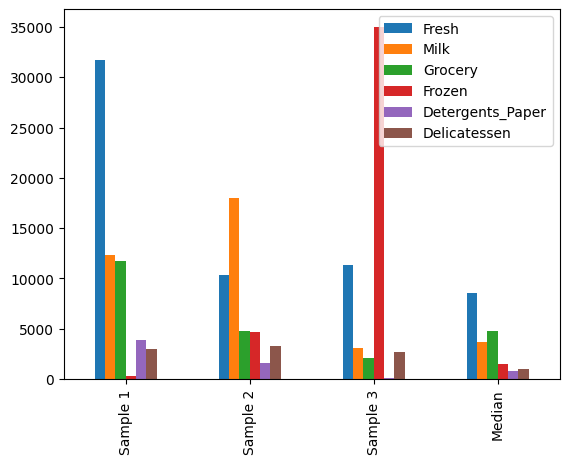

In [9]:
# Representation of the samples by features
import seaborn as sns
import matplotlib.pyplot as plt

samples_for_plot = samples.copy()
samples_for_plot.loc[3] = data.median()

labels = ['Sample 1','Sample 2','Sample 3','Median']
samples_for_plot.plot(kind='bar')
plt.xticks(range(4),labels)
plt.show()

### Analysis 1
The mean values
* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.2
* Frozen: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8


- Wholesale Retailers as for index 12. As the features Fresh, Grocery have values which are more than the mean values and the rest of the other below its mean, which signifies of the Retailers Target.
- Cafe as for index 254. As the Milk feature has a very high value in comparison to its mean and all the other features below mean value suggest that the establishment might be Cafe.
- Hotel as for index 93. As there is a signinficant value for Frozen (that means high value than the average 3071.9) and the rest features as in normal, which makes them it to be considered as Hotels that have Target Alliance
.

### Implementation: Feature Relevance


In [10]:
new_data = data.drop('Grocery', axis = 1, inplace = False)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Grocery'],test_size = 0.25, random_state = 42)

from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 42)
regressor.fit(X_train, y_train)

score = regressor.score(X_test, y_test)
print(score)

0.6818840085440834


I attempted to predict the "Grocery" feature because of the large standard deviation among the features.
- The reported prediction score by our DecisionTree Regressor is around 0.681.
- The "Grocery" feature is the only feature having maximum score but the value is aslo quite low which means that all our features are quited independent in identifying customer's spending habits.
- When we calculate the scores for all the features we get R^2 as 0.681 as the highest for Grocery Feature only and for some feature the model fails to fit, by giving a negative score.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

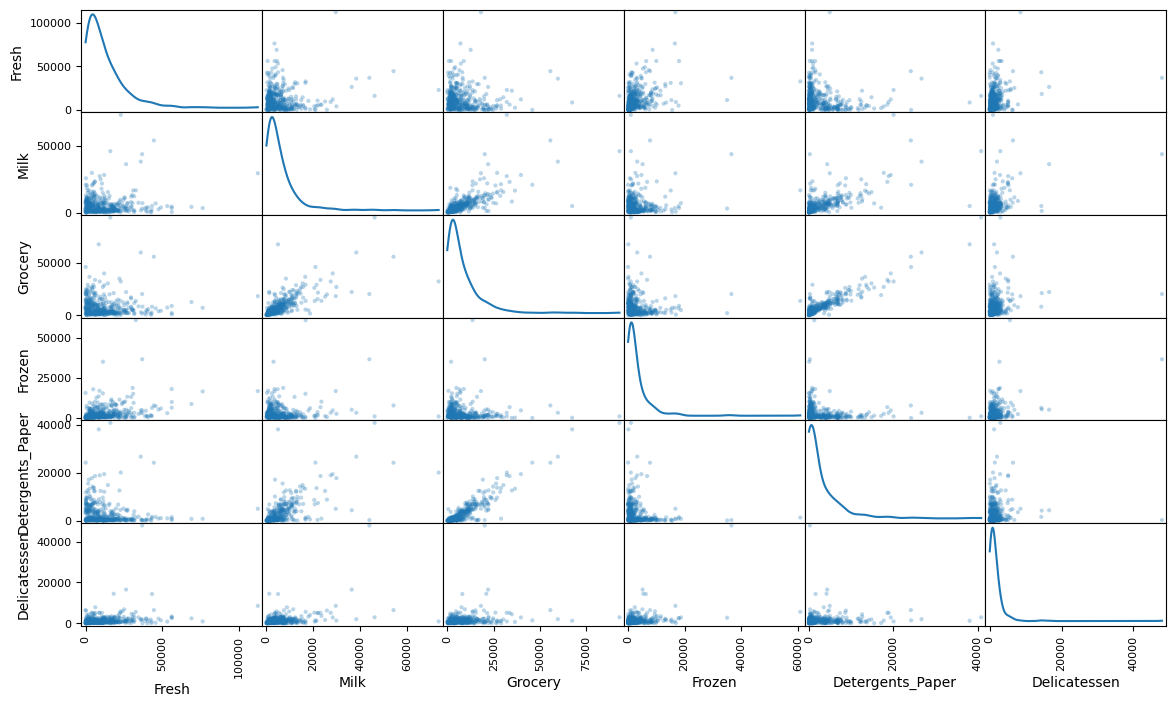

In [11]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');


- By the scatter matrix we can state that the data points are concentrated near 0 mostly, whereas the outliers are present in  every feature vs another feature.
- The pair between Grocery and Detergents_Paper have a highest degree of correlation from the below heatmap.
- Well from the correlation diagram of the features below (Heatmap) we conclude that the Milk has the highest correlation in relation to the other features comparison with. This disproves the assumption of ours that Fresh feature is relevant.
- The data for the most of the features have low correlation and mostly distributed around the point 0, that concludes the data is not normally distributed.

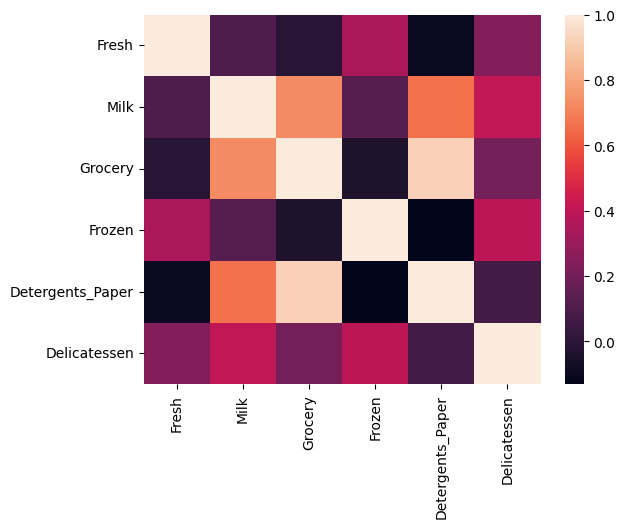

In [12]:
# Heatmap visualization for correlation of the features
import seaborn as sns
sns.heatmap(data.corr());

## Data Preprocessing


### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.



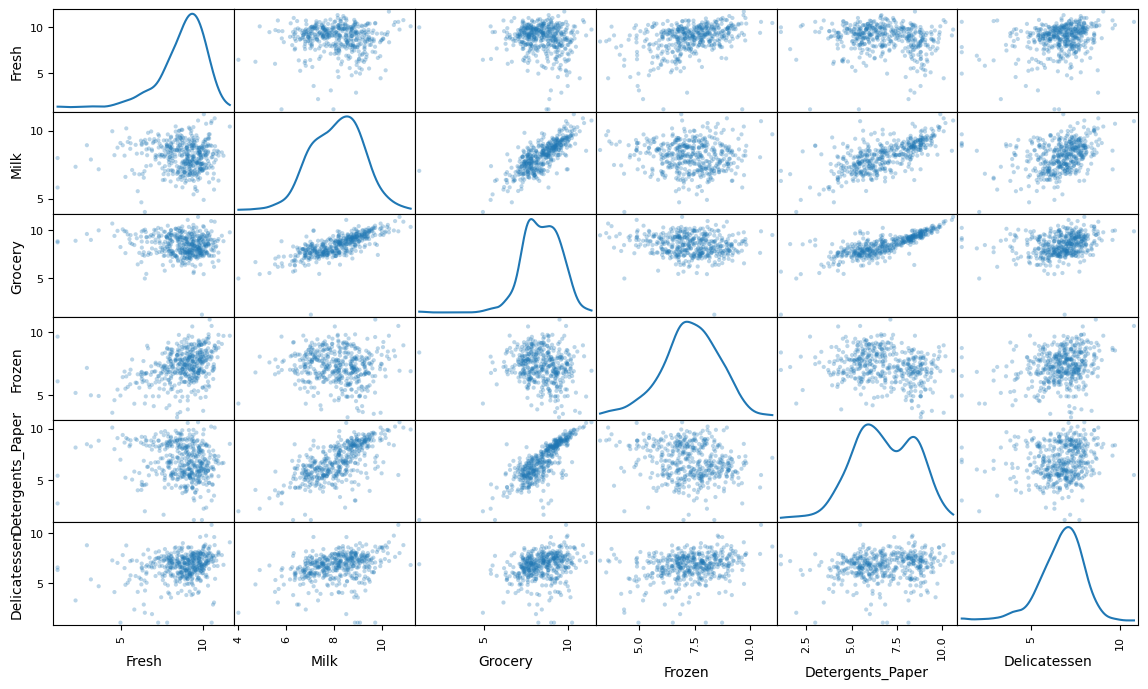

In [13]:
log_data = np.log(data)

log_samples = np.log(samples)

pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).



In [14]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.364514,9.418898,9.372204,5.659482,8.263848,7.983099
1,9.247540,9.796570,8.465479,8.452335,7.344073,8.091015
2,9.333796,8.035926,7.631432,10.463360,4.262680,7.900266


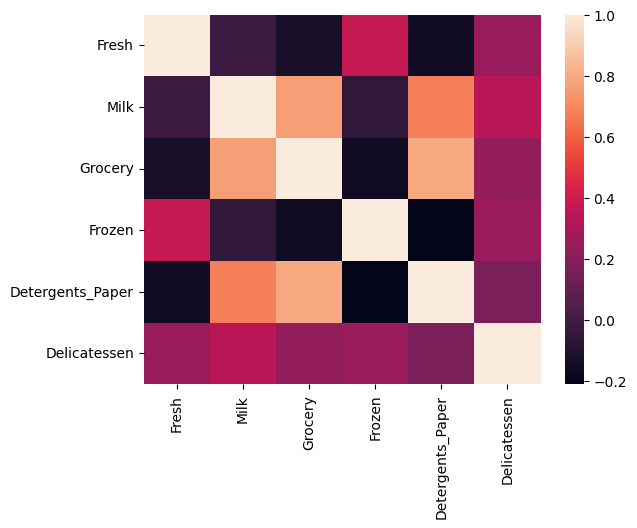

In [15]:
# Heatmap visualization for the scaled data
sns.heatmap(log_data.corr());

- After scaling the data we observe that there is

---

still correlation present, however the correlation for them is very slightly weaker than before but it is negligible.

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.



In [16]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():

    Q1 = np.percentile(log_data[feature], 25.0)

    Q3 = np.percentile(log_data[feature], 75.0)

    step = (Q3-Q1)*1.5

    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])

outliers  = [65,66,75,81,86,128,171,193,304,305,325,355,183,154]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


 We observe that there are several rows which are common to multiple categories and some rows have a very high and low values which makes them necessary to be removed.
- There are several data points we observe that are considered to be outliers in multiple features, these are of indices : 65, 66, 75, 128, 154.
- These data points (which are common to multiple ones) need to be removed, as it can affect our results.
- The data points which were common to multiple features and also having a very high or low value must be removed because when we operate Algorithms like K-Means which are very sensitive to Outliers can result in a different or insignificant clustering, which is not benefecial to us.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.



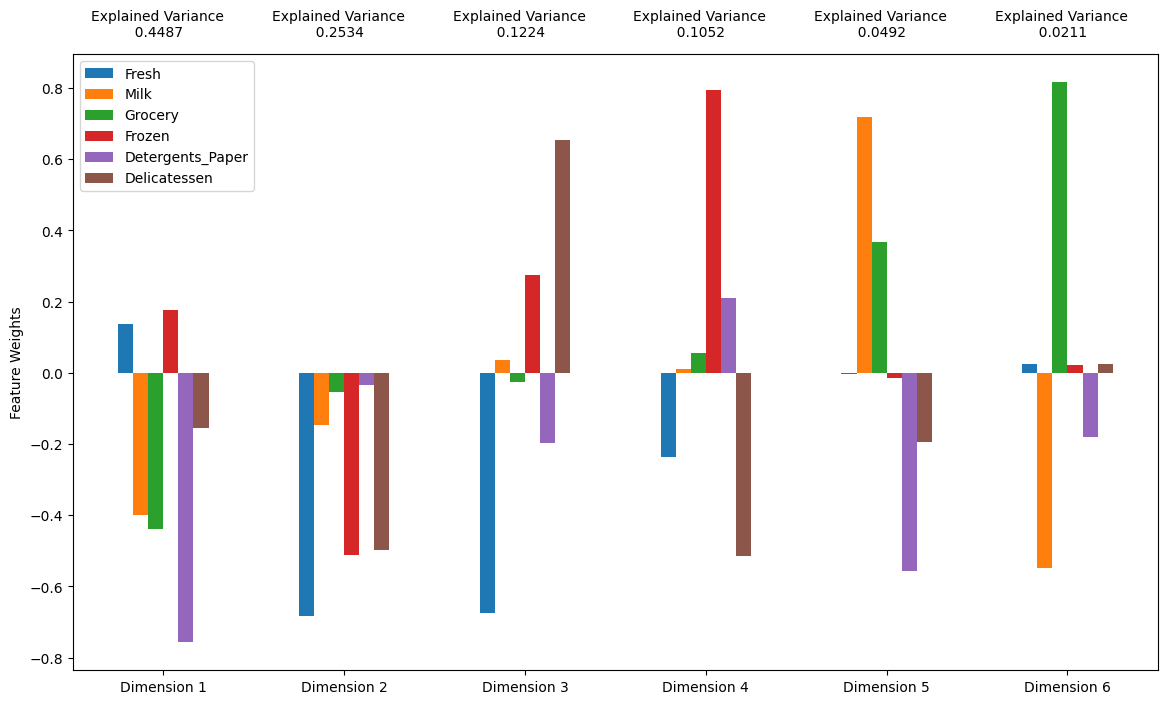

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 6).fit(good_data)

pca_samples = pca.transform(log_samples)

pca_results = vs.pca_results(good_data, pca)

 - The total variance obtained from both the first and second principal components is 0.7036
 - From all the first four components we obtain 0.927 as the total variance.

 - For the first dimension as we can see many features have been negative-weighted, where the Detergents Paper is the most negative-weighted and Frozen is the most positive-weighted
 - From the second dimension we can observe that all the features are negative-weighted and the feature Fresh is the most neagative-weighted
 - From the third dimension the features Fresh is the most negative-weighted whereas the Delicatessen is the most positive-weighted in this dimension
 - The fourth dimension has a very high weight of Frozen i.e 0.8, whereas the Delicatessen has a -0.5 value as a variance.
 - The fifth dimension has the total variance as nearly to zero.
 - The sixth dimension having Grocery and Milk has a pretty high variance and high negative variance respectively.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [18]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-2.3447,-1.1529,-0.9321,-1.9840,0.2261,-0.1902
1,-1.0809,-1.8441,0.8773,0.2093,0.6206,-0.9353
2,2.7172,-2.4319,1.8125,1.1766,0.7742,-0.0557


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.



In [19]:
pca = PCA(n_components = 2).fit(good_data)

reduced_data = pca.transform(good_data)

pca_samples = pca.transform(log_samples)

reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation

the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [20]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-2.3447,-1.1529
1,-1.0809,-1.8441
2,2.7172,-2.4319


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

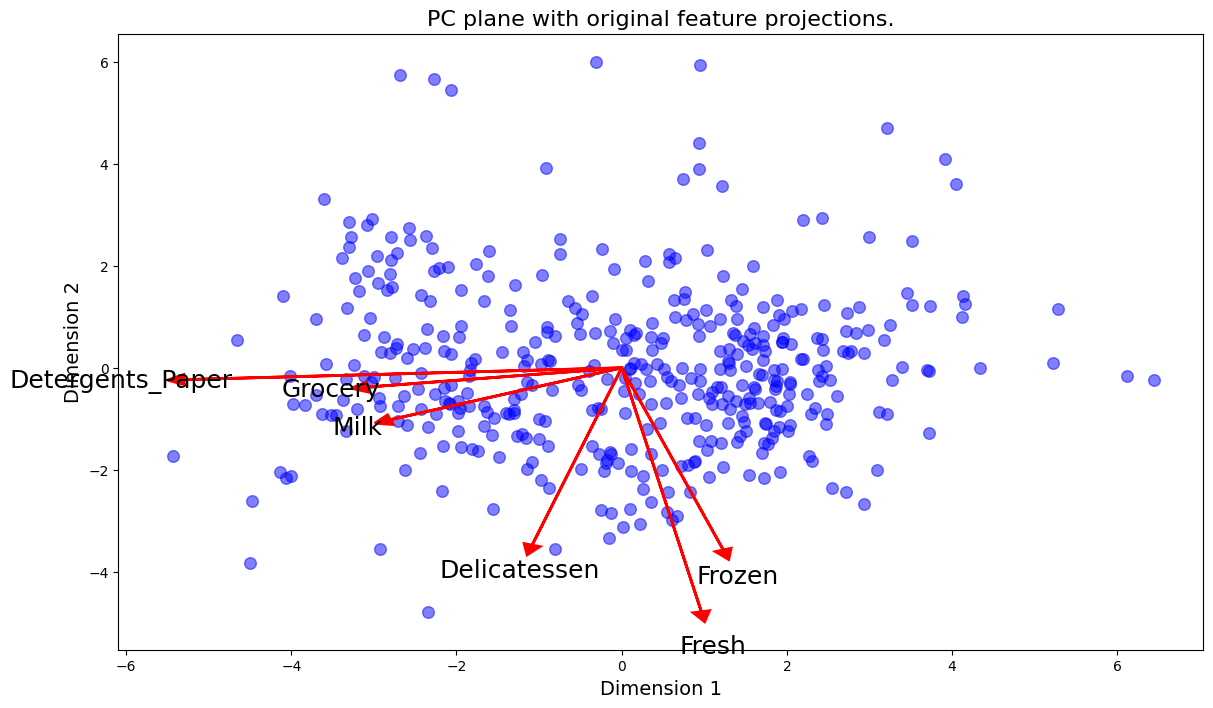

In [21]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca);

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories.



- The feature Fresh is most strongly correlated with the first component
- In the second component Detergents Paper is most strongly correlated feature.
- As we observe in the pca_results plot the features in first and second dimension were the Detergents Paper and Fresh, most negatively-weighted values which represents as in opposite directions of biplot with same highest magnitude.

## Clustering



**Answer:**
- The K-Means Algorithm is pretty fast in processing and if the data has no noise or outliers then it gives accurate results.
- The Guassian Mixture Model clustering Algorithm are the only one in which we can find a datapoint probability in one dimension to another, also the major advantage is that it adapts its shape as per distribution of datapoints.
- As we have the data in which we did dimensionality reduction for our features and now the data we have is can be soft clustered as in both the dimensions we have the same set of features with a maximal variance, this mixing makes Guassian Mixture Model Algorithm to be perfect for our customer data.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.



In [22]:
from sklearn.mixture import GaussianMixture
clusterer = GaussianMixture(n_components = 2, random_state = 42).fit(reduced_data)

preds = clusterer.predict(reduced_data)

centers = clusterer.means_

sample_preds = clusterer.predict(pca_samples)

from sklearn.metrics import silhouette_score
score = silhouette_score(reduced_data, preds)
print(score)

0.42338584366343746


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


-  I tried upto the first four number of clusters having silhoutte coefficients as 0.413, 0.408, 0.314 respectively.
- The two as the number of cluster gives the highest silhoutte score which means it is the best.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters.

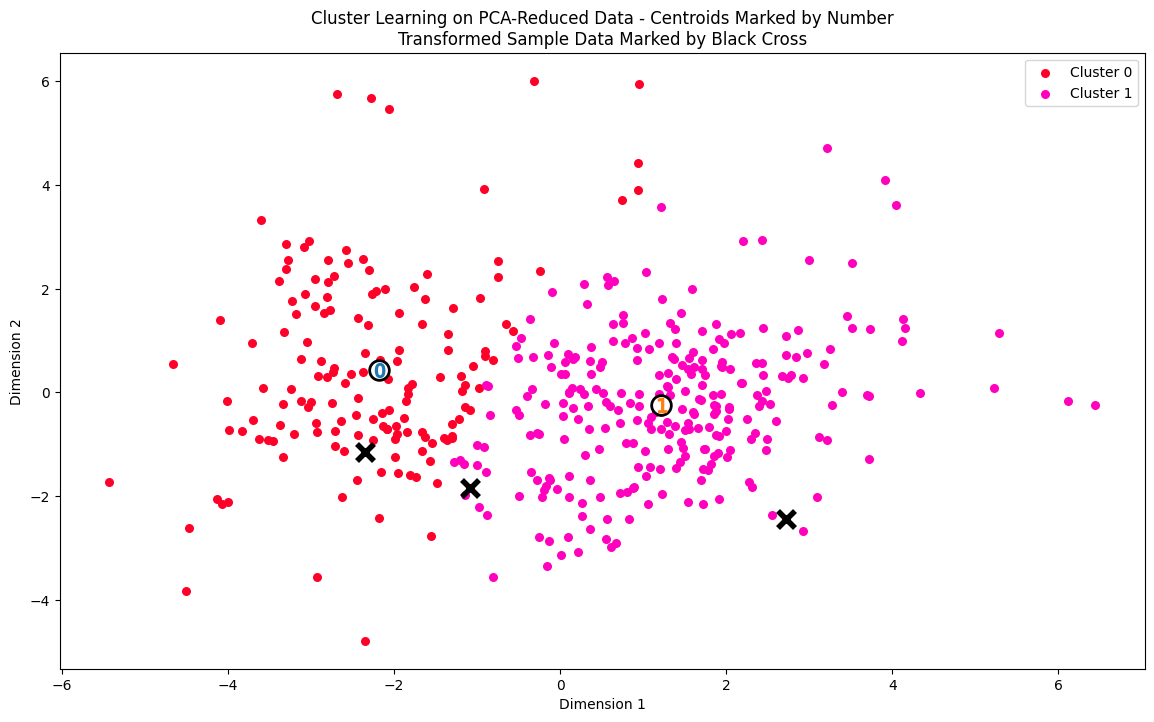

In [23]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.



In [24]:
log_centers = pca.inverse_transform(centers)

true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3694.0,7423.0,11747.0,833.0,4482.0,908.0
Segment 1,9257.0,2105.0,2744.0,2117.0,352.0,745.0


### Question 8



By comparing with the mean values obtained, we observe that the Segment 0 belongs to the Retailers as they have very high purchase of grocery and other items as well, which means it represents Cluster 0. Whereas in Hotels, cafes, or anyelse the products are taken by requirements and sometimes Milk are dominant, which concludes Segment 1 represents the cluster 1.

In [25]:
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


The predictions for each sample point is accurate which is very exciting, the customer segments are well classified so that they are able to extract the sample points.

## Conclusion


 We can perform A/B testing to each customer segments individually and now if  would have a positive reaction then it can be checked by our clusters. One more method is to compare the centers of the clusters the distributor obtain of the previous and current week.
- In A/B testing we generally have Null and Alternate Hypothesis, which we can take here as Positive reaction of customers as the Null Hypothesis. The distributor then will take each customer segments and then he will calculate the P-Value and then we will compare it by the error 0.05, by this we conclude on the resulting hypothesis.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?



 The distributer can run supervised Learning Algorithm on the datas with target variable as new customers and check for the scores. If the score obtained is 0 then we conclude that the target variable is totaly independent hence labeling new customers.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

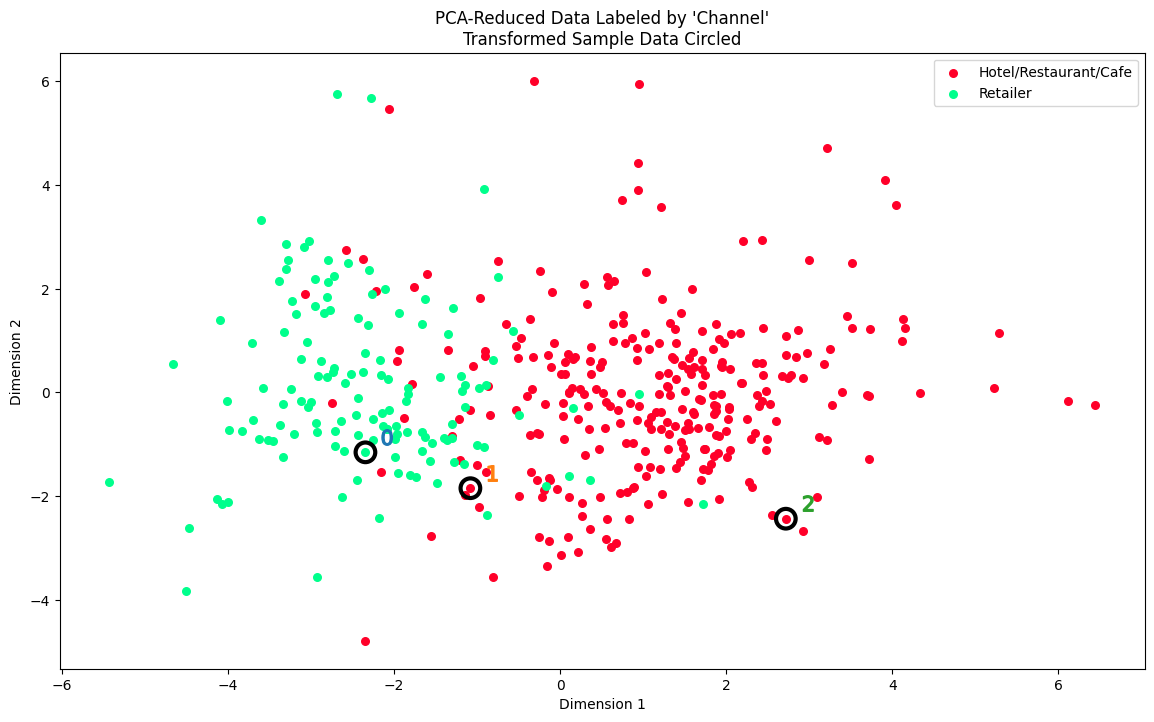

In [26]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

- The clustering Algorithm performs very well with two number of clusters as compared to the above distribution.
- NO but if we have the value of a particular feature significantly high whereas the other below to mean then by only two number of cluster then we can classify it purely.
- It is totally consistent classifications above compared with the obtained customer segment.